In [12]:
import os
import zipfile
import numpy as np
from PIL import Image
from datetime import date
import matplotlib.pyplot as plt
import xarray as xr

from snappy import ProductIO, GPF, HashMap, ProductUtils, PixelPos, GeoPos, ProductData, jpy
from sentinelsat import SentinelAPI, read_geojson, geojson_to_wkt, make_path_filter

%matplotlib inline

In [2]:
# Parameters

sal = 35.0
temp = 15.0
ozo = 330.0
pres = 1000.0
TSMfakBpart = 1.72
TSMfakBwit = 3.1
CHLexp = 1.04
CHLfak = 21.0
thresholdRtosaOOS = 0.005
thresholdAcReflecOos = 0.1
thresholdCloudTDown865 = 0.955
outputAsRrs = False
deriveRwFromPathAndTransmittance = False
useEcmwfAuxData = True
outputRtoa = True
outputRtosaGc = False
outputRtosaGcAann = False
outputRpath = False
outputTdown = False
outputTup = False
outputAcReflectance = True
outputRhown = True
outputOos = False
outputKd = True
outputUncertainties = True

In [3]:
# read env variables
api = SentinelAPI(os.getenv("FIN_HUB_USER"),
                  os.getenv("FIN_HUB_PASSWORD"),
                  "https://finhub.nsdc.fmi.fi/")

In [16]:
def query_products(footprint, start_date, end_date, producttype, maxclouds=100):
    
    path_filter = make_path_filter("_NT_")

    # At least for Sentinel-3 querying for the whole region works.
    # So maybe the problem with querying periods longer than 1 day is only the S2 case 

    products = api.query(footprint,
                         date=(start_date, end_date),
                         # platformname='Sentinel-2', 
                         # cloudcoverpercentage=(0, maxclouds),
                         producttype=producttype)

    return products.keys()

In [17]:
footprint = geojson_to_wkt(read_geojson('indre-oslofjord.geojson'))
platformname = 'Sentinel-2'
start_date = date(2024, 3, 21)
end_date = date(2024, 3, 23)
cloudcoverpercentage=(0, 100)
producttype = 'OL_1_EFR___'

In [18]:
query_products(footprint, start_date, end_date, producttype)

odict_keys(['520d4e49-869b-467d-b7ca-05fc5b9194e5', '22c84761-2162-49e1-9738-1c8a074d6db8', 'ea4a4239-cb6d-4d52-a3ef-a6ca6cfdbdb7', '53fe47d4-1e55-4cb5-8ac9-231cad2aa585', '0bb8304d-e83a-4344-a599-15952be5a7bd', '1210f22a-54aa-444a-858a-47e29378dd55', '79cae89d-176b-4e79-9a4f-42c7088be14f', '74d8bdf7-e0f0-4703-8d6f-124408c650a4'])

In [9]:
api.download_all_quicklooks(products)

ResultTuple(downloaded={'520d4e49-869b-467d-b7ca-05fc5b9194e5': {'id': '520d4e49-869b-467d-b7ca-05fc5b9194e5', 'title': 'S3A_OL_1_EFR____20240322T102852_20240322T103152_20240323T105256_0179_110_222_1980_PS1_O_NT_003', 'size': 891842953, 'md5': 'ea6bf32d79101d0059c8bf1fba3e4b4c', 'date': datetime.datetime(2024, 3, 22, 10, 28, 51, 700000), 'footprint': 'POLYGON((-11.1091 52.457,-10.096 52.3953,-9.08142 52.3249,-8.07556 52.2462,-7.08247 52.1624,-6.08408 52.0668,-5.0903 51.9629,-4.10307 51.8511,-3.1182 51.7302,-2.1467 51.6022,-1.17255 51.465,-0.209076 51.3203,0.749529 51.1675,1.70585 51.0063,2.64962 50.8388,3.58885 50.6632,4.52326 50.4807,5.44878 50.2901,6.36478 50.0926,7.27507 49.8872,8.75923 52.4343,10.4158 54.9672,12.2803 57.4771,14.4024 59.9573,13.2682 60.2136,12.1221 60.4585,10.9528 60.6946,9.7723 60.9182,8.57093 61.1333,7.3555 61.3372,6.12943 61.5297,4.87892 61.7126,3.61906 61.8833,2.34584 62.0423,1.06138 62.1891,-0.238275 62.3242,-1.54849 62.4464,-2.87002 62.5567,-4.19162 62.6538,-5

In [19]:
api.download("22c84761-2162-49e1-9738-1c8a074d6db8")

MD5 checksumming:   0%|          | 0.00/892M [00:00<?, ?B/s]

{'id': '74d8bdf7-e0f0-4703-8d6f-124408c650a4',
 'title': 'S3A_OL_1_EFR____20240321T091403_20240321T091703_20240321T111904_0180_110_207_1980_PS1_O_NR_003',
 'size': 892346516,
 'md5': '300e473665f2f89da03a8807b82226ad',
 'date': datetime.datetime(2024, 3, 21, 9, 14, 2, 984000),
 'footprint': 'POLYGON((7.59237 52.4546,8.60591 52.3929,9.61375 52.3229,10.6222 52.2441,11.6193 52.16,12.6183 52.0644,13.6106 51.9606,14.5977 51.8488,15.5803 51.7282,16.5542 51.5999,17.5284 51.4627,18.4918 51.318,19.4509 51.1652,20.4071 51.0039,21.3505 50.8365,22.2895 50.661,23.2236 50.4785,24.1495 50.2879,25.0663 50.0902,25.9757 49.8849,27.4598 52.4321,29.116 54.9655,30.9803 57.4744,33.102 59.9559,31.9692 60.2118,30.823 60.4568,29.6528 60.693,28.4729 60.9165,27.2706 61.1318,26.0554 61.3356,24.827 61.5284,23.5791 61.7109,22.3194 61.8815,21.0455 62.0405,19.761 62.1874,18.4613 62.3225,17.1515 62.4446,15.8316 62.5547,14.5163 62.6513,13.1806 62.7363,11.8484 62.8054,10.4923 62.8652,9.11579 62.9128,8.74544 60.2986,8.36

In [7]:
def extract_file(filename):
    try:
        zip_ref = zipfile.ZipFile(filename + '.SAFE.zip', 'r')
        zip_ref.extractall("./data")
        zip_ref.close()
    except zipfile.BadZipfile:
        print("Error")

def read_S3(filename):
    reader = ProductIO.getProductReader('SENTINEL-3')
    return  ProductIO.readProduct('./data/' + filename + '.SEN3')

In [8]:
FILENAME_NO_EXT = "S3B_OL_1_EFR____20240322T094951_20240322T095251_20240322T204507_0180_091_079_1980_PS2_O_NT_003"

extract_file(FILENAME_NO_EXT)
p = read_S3(FILENAME_NO_EXT)

In [9]:
print(list(p.getBandNames()))

['Oa01_radiance', 'Oa01_radiance_unc', 'Oa02_radiance', 'Oa02_radiance_unc', 'Oa03_radiance', 'Oa03_radiance_unc', 'Oa04_radiance', 'Oa04_radiance_unc', 'Oa05_radiance', 'Oa05_radiance_unc', 'Oa06_radiance', 'Oa06_radiance_unc', 'Oa07_radiance', 'Oa07_radiance_unc', 'Oa08_radiance', 'Oa08_radiance_unc', 'Oa09_radiance', 'Oa09_radiance_unc', 'Oa10_radiance', 'Oa10_radiance_unc', 'Oa11_radiance', 'Oa11_radiance_unc', 'Oa12_radiance', 'Oa12_radiance_unc', 'Oa13_radiance', 'Oa13_radiance_unc', 'Oa14_radiance', 'Oa14_radiance_unc', 'Oa15_radiance', 'Oa15_radiance_unc', 'Oa16_radiance', 'Oa16_radiance_unc', 'Oa17_radiance', 'Oa17_radiance_unc', 'Oa18_radiance', 'Oa18_radiance_unc', 'Oa19_radiance', 'Oa19_radiance_unc', 'Oa20_radiance', 'Oa20_radiance_unc', 'Oa21_radiance', 'Oa21_radiance_unc', 'altitude', 'latitude', 'longitude', 'detector_index', 'FWHM_band_1', 'FWHM_band_2', 'FWHM_band_3', 'FWHM_band_4', 'FWHM_band_5', 'FWHM_band_6', 'FWHM_band_7', 'FWHM_band_8', 'FWHM_band_9', 'FWHM_band_

In [10]:
def crop_product(product):

    HashMap = jpy.get_type('java.util.HashMap')
    parameters = HashMap()
    
    parameters.put('copyMetadata', True)
    parameters.put('geoRegion', footprint)

    return GPF.createProduct('Subset', parameters, product)

In [11]:
image_subset = crop_product(p)


100% done.


INFO: org.hsqldb.persist.Logger: dataFileCache open start


In [12]:
def plotBand(product, band):
     
    band = product.getBand(band)

    w = band.getRasterWidth()
    h = band.getRasterHeight()

    band_data = np.zeros(w * h, np.float32)
    band.readPixels(0, 0, w, h, band_data)

    band_data.shape = h, w

    width = 12
    height = 12
    plt.figure(figsize=(width, height))
    imgplot = plt.imshow(band_data, cmap=plt.cm.binary)
    
    return  

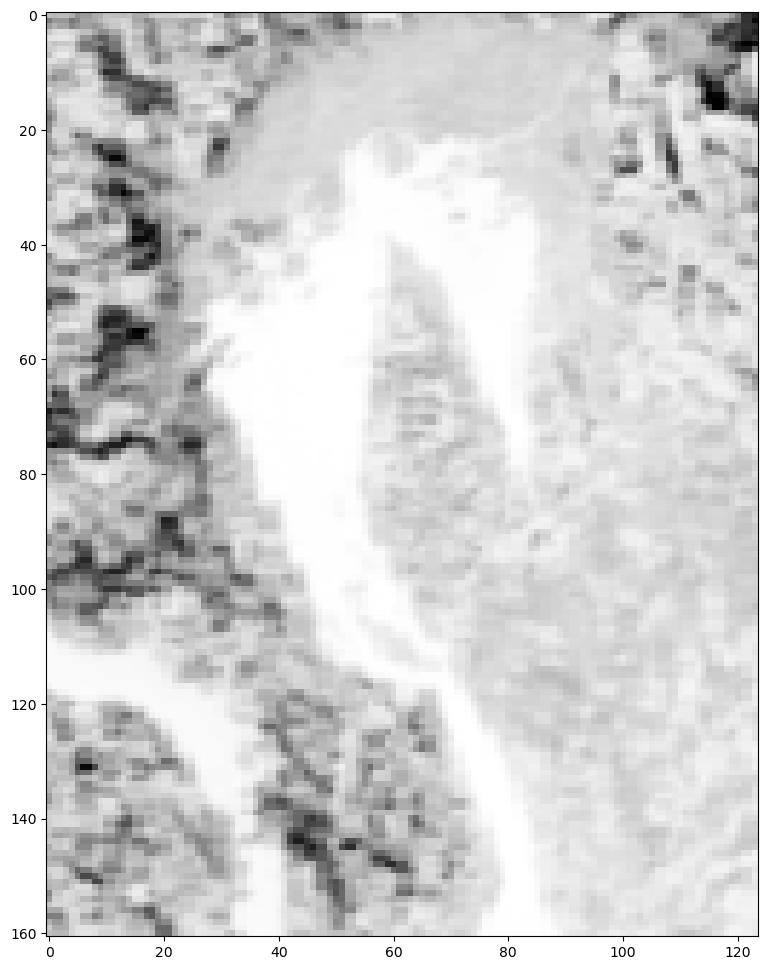

In [13]:
plotBand(image_subset, 'Oa09_radiance')

In [22]:
def reproject_product(product, crs='EPSG:4326'):
    """
    Return the product, projected with the selected 
    """

    HashMap = jpy.get_type('java.util.HashMap') 
    parameters = HashMap()
    
    parameters.put('crs', crs) 
    parameters.put('noDataValue', 0.0)

    return GPF.createProduct('Reproject', parameters, product)

In [23]:
p2 = reproject_product(p)

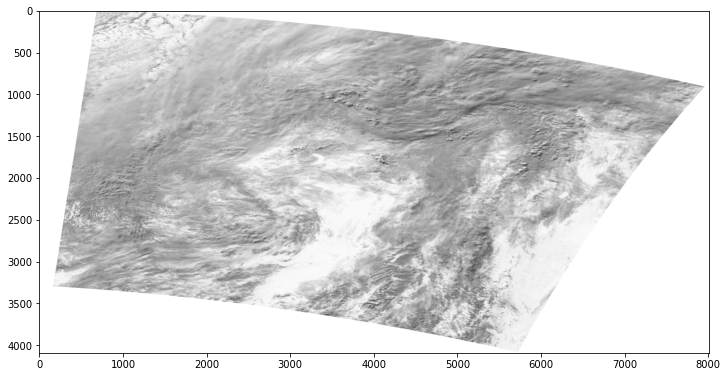

In [20]:
plotBand(p2, 'Oa08_radiance')

In [15]:
def plotRGB(product):
    red_radiance = product.getBand('Oa08_radiance')
    green_radiance = product.getBand('Oa06_radiance')
    blue_radiance = product.getBand('Oa04_radiance')
    
    w = red_radiance.getRasterWidth()
    h = red_radiance.getRasterHeight()
    
    red_radiance_data = np.zeros(w * h, np.float32)
    red_radiance.readPixels(0, 0, w, h, red_radiance_data)
    red_radiance_data.shape = h, w
    
    green_radiance_data = np.zeros(w * h, np.float32)
    green_radiance.readPixels(0, 0, w, h, green_radiance_data)
    green_radiance_data.shape = h, w
    
    blue_radiance_data = np.zeros(w * h, np.float32)
    blue_radiance.readPixels(0, 0, w, h, blue_radiance_data)
    blue_radiance_data.shape = h, w
    
    xmax=200
    red = (red_radiance_data*256/(xmax-np.amin(red_radiance_data)))
    green = (green_radiance_data*256/(xmax-np.amin(green_radiance_data)))
    blue = (blue_radiance_data*256/(xmax-np.amin(blue_radiance_data)))
    
    rgb_uint8 = np.dstack((red, green, blue)).astype(np.uint8) 
    
    width = 12
    height = 12
    plt.figure(figsize=(width, height))
    img = Image.fromarray(rgb_uint8)
    imgplot = plt.imshow(img)

In [15]:
opSpi = GPF.getDefaultInstance().getOperatorSpiRegistry().getOperatorSpi("c2rcc.olci")

paramDescList = opSpi.getOperatorDescriptor().getParameterDescriptors()
for param in paramDescList:
    print(param.getName())

validPixelExpression
salinity
temperature
ozone
press
TSMfakBpart
TSMfakBwit
CHLexp
CHLfak
thresholdRtosaOOS
thresholdAcReflecOos
thresholdCloudTDown865
atmosphericAuxDataPath
alternativeNNPath
outputAsRrs
deriveRwFromPathAndTransmittance
useEcmwfAuxData
outputRtoa
outputRtosaGc
outputRtosaGcAann
outputRpath
outputTdown
outputTup
outputAcReflectance
outputRhown
outputOos
outputKd
outputUncertainties


In [16]:
def run_c2rcc(product):
    """
    Run C2RCC on the product 
    """

    HashMap = jpy.get_type('java.util.HashMap') 
    parameters = HashMap()

    parameters.put('validPixelExpression', '!quality_flags.invalid && (!quality_flags.land || quality_flags.fresh_inland_water)')
    parameters.put('temperature', 15.0)
    parameters.put('salinity', 35.0)
    parameters.put('ozone', 330.0)
    parameters.put('press', 1000.0)
    parameters.put('TSMfakBpart', 1.72)
    parameters.put('TSMfakBwit', 3.1)
    parameters.put('CHLexp', 1.04)
    parameters.put('CHLfak', 21.0)
    parameters.put('thresholdRtosaOOS', 0.005)
    parameters.put('thresholdAcReflecOos', 0.1)
    parameters.put('thresholdCloudTDown865', 0.955)
    parameters.put('outputAsRrs', True)
    parameters.put('deriveRwFromPathAndTransmittance', True)
    parameters.put('useEcmwfAuxData', True)
    parameters.put('outputRtoa', True)
    parameters.put('outputRtosaGc', True)
    parameters.put('outputRtosaGcAann', True)
    parameters.put('outputRpath', True)
    parameters.put('outputTdown', True)
    parameters.put('outputTup', True)
    parameters.put('outputAcReflectance', True)
    parameters.put('outputRhown', True)
    parameters.put('outputOos', True)
    parameters.put('outputKd', True)
    parameters.put('outputUncertainties', True)

    # opSpi = GPF.getDefaultInstance().getOperatorSpiRegistry().getOperatorSpi("c2rcc.olci")
    
    return GPF.createProduct('c2rcc.olci', parameters, product)

In [17]:
result = run_c2rcc(image_subset)

Preparing computation
50%100% done.


INFO: org.esa.s3tbx.c2rcc.olci.C2rccOlciOperator: c2rcc initial tile : null, configured tile: java.awt.Dimension[width=1217,height=1023]


In [21]:
def save_result(result):
    write_format = 'NetCDF4-CF' # BEAM-DIMAP, GeoTIFF, GeoTIFF-BigTIFF

    # ProductIO.getProductWriter('GeoTIFF')
    ProductIO.writeProduct(result, './output.nc', write_format)

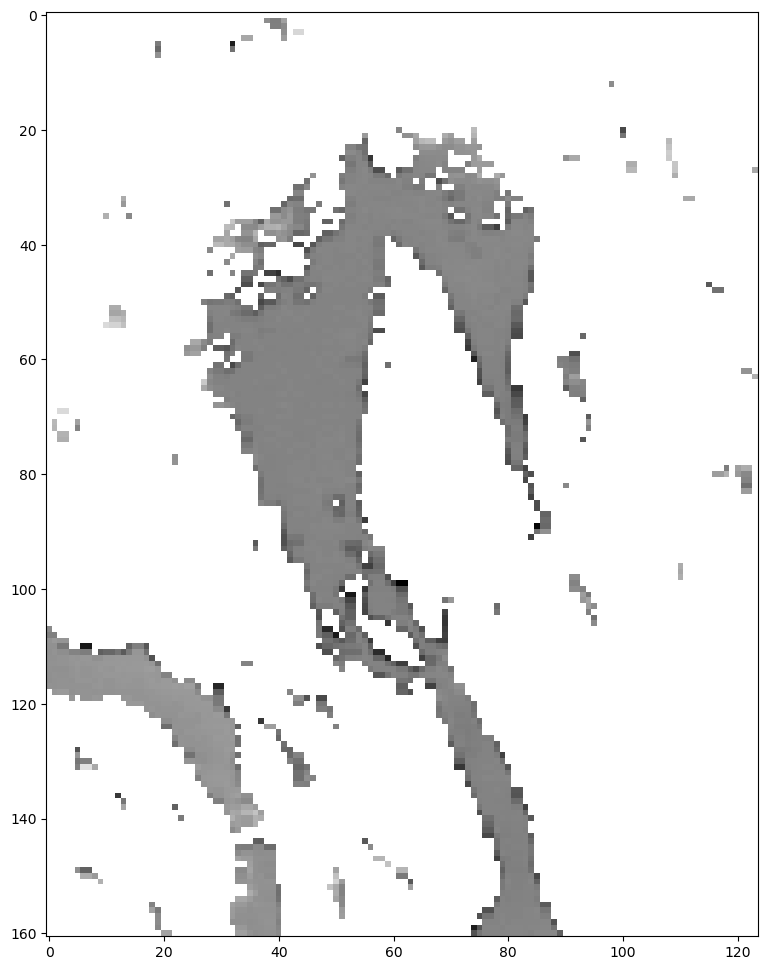

In [22]:
plotBand(result, 'iop_apig')

In [ ]:
# https://stackoverflow.com/questions/52293759/snappy-wrong-conversion-from-pixel-to-lat-long
# https://forum.step.esa.int/t/extracting-pixel-values-sentinel-2a-l2a-with-snap-or-snappy/29878/4

In [23]:
def coords_from_xy(geocode, x, y):
    geoPos = geocode.getGeoPos(PixelPos(x, y), None)
    lat = geoPos.getLat()
    lon = geoPos.getLon()
    
    return lat, lon

def xy_from_coords(geocode, lat, lon):
    pixelPos = geocode.getPixelPos(GeoPos(lat, lon), None)
    x = np.round(pixelPos.getX())
    y = np.round(pixelPos.getY())
    
    return x, y

In [25]:
sg = result.getSceneGeoCoding()

lat = 59.872789
lon = 10.656834
 
x, y = xy_from_coords(sg, lat, lon)
print(x, y)
print(coords_from_xy(sg, x, y))

58.0 38.0
(59.871334, 10.653300999999999)


In [38]:
def get_chl_from_lat_lon(c2rcc_output, lat, lon):
    
    sg = c2rcc_output.getSceneGeoCoding()
    try:
        x, y = xy_from_coords(sg, lat, lon)
    except ValueError:
        print("Coordinates are outside the region of interest")
        return
    
    raw_chl_value = result.getBand('iop_apig').readPixels(int(x), int(y), 1, 1, np.zeros(1))
    return np.power(raw_chl_value, 1.04) * 21  # Default values from SNAP
    

In [39]:
get_chl_from_lat_lon(result, 59.872789, 10.656834)

array([19.32243674])

In [41]:
result.getBand('iop_apig').readPixels(int(x), int(y), 1, 1, np.zeros(1))

array([0.92306709])

INFO: org.hsqldb.persist.Logger: Database closed
